In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [311]:
# dftrain=pd.read_csv(r"C:\Users\anupa\Downloads\train_ctrUa4K.csv")

In [312]:
# dftest=pd.read_csv(r"C:\Users\anupa\Downloads\test_lAUu6dG.csv")


In [313]:
# dfsample=pd.read_csv(r"C:\Users\anupa\Downloads\sample_submission_49d68Cx.csv")

In [314]:
!pip install xgboost

In [315]:
data=pd.read_csv(r"C:\Users\anupa\Downloads\train_ctrUa4K.csv")

In [316]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [317]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [318]:
data.shape

(614, 13)

In [319]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [320]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [321]:
num_data = data.select_dtypes(include = "number")
cat_data = data.select_dtypes(include = "object")

In [322]:
num_cols = num_data.columns.to_list()

In [323]:
cat_cols = cat_data.columns.to_list()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

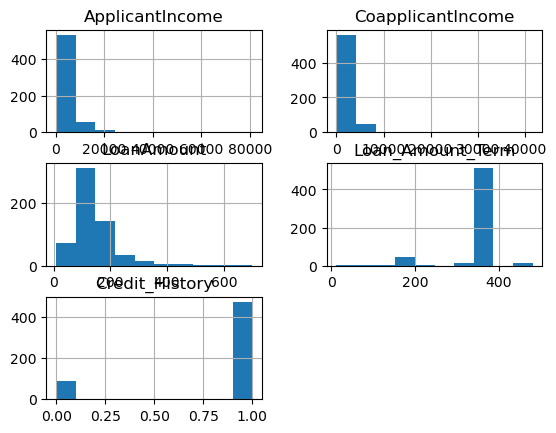

In [324]:
data.hist(num_cols)

In [325]:
print(data[num_cols].skew())

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


In [326]:
for col in num_data.columns:
    if num_data[col].skew() >= 0 and num_data[col].skew() <= 0.5:
        num_data[col] = num_data[col].fillna(num_data[col].mean())
    else:
        num_data[col] = num_data[col].fillna(num_data[col].median())

In [327]:
for col in cat_data.columns:
    cat_data[col] = cat_data[col].fillna(cat_data[col].mode()[0]) 

In [328]:
cat_data.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [329]:
data = pd.concat([num_data, cat_data], axis = 1)

In [330]:
data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [331]:
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

In [332]:
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [333]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

for col in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']:
    data[col] = Label_Encoder.fit_transform(data[col])

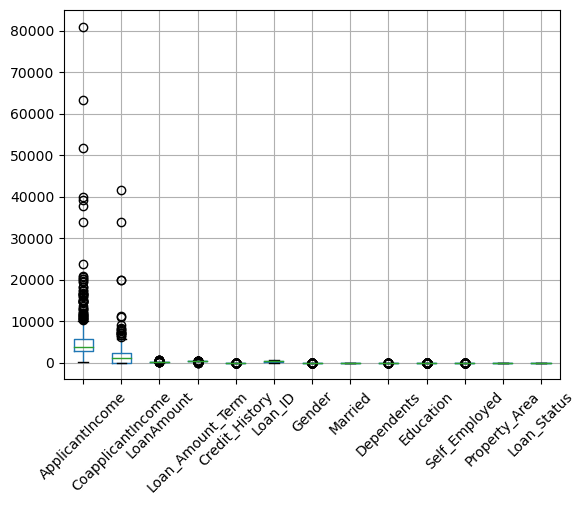

In [334]:
data.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [335]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [336]:
from sklearn.model_selection import train_test_split

In [337]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [338]:
from sklearn.svm import SVC

In [339]:
svm_cls = SVC(kernel = 'rbf')
svm_cls = svm_cls.fit(x_train, y_train)
y_pred_svm = svm_cls.predict(x_test)

In [340]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 

In [341]:
print('Accuracy is:', accuracy_score(y_test,y_pred_svm))
print('Precision is:', precision_score(y_test,y_pred_svm))
print('Recall is:', recall_score(y_test,y_pred_svm))
print('F1_score is:', f1_score(y_test,y_pred_svm))

Accuracy is: 0.6504065040650406
Precision is: 0.6504065040650406
Recall is: 1.0
F1_score is: 0.7881773399014779


In [342]:
confusion_matrix(y_test, y_pred_svm)

array([[ 0, 43],
       [ 0, 80]], dtype=int64)

In [343]:
corr_matrix = data.corr()

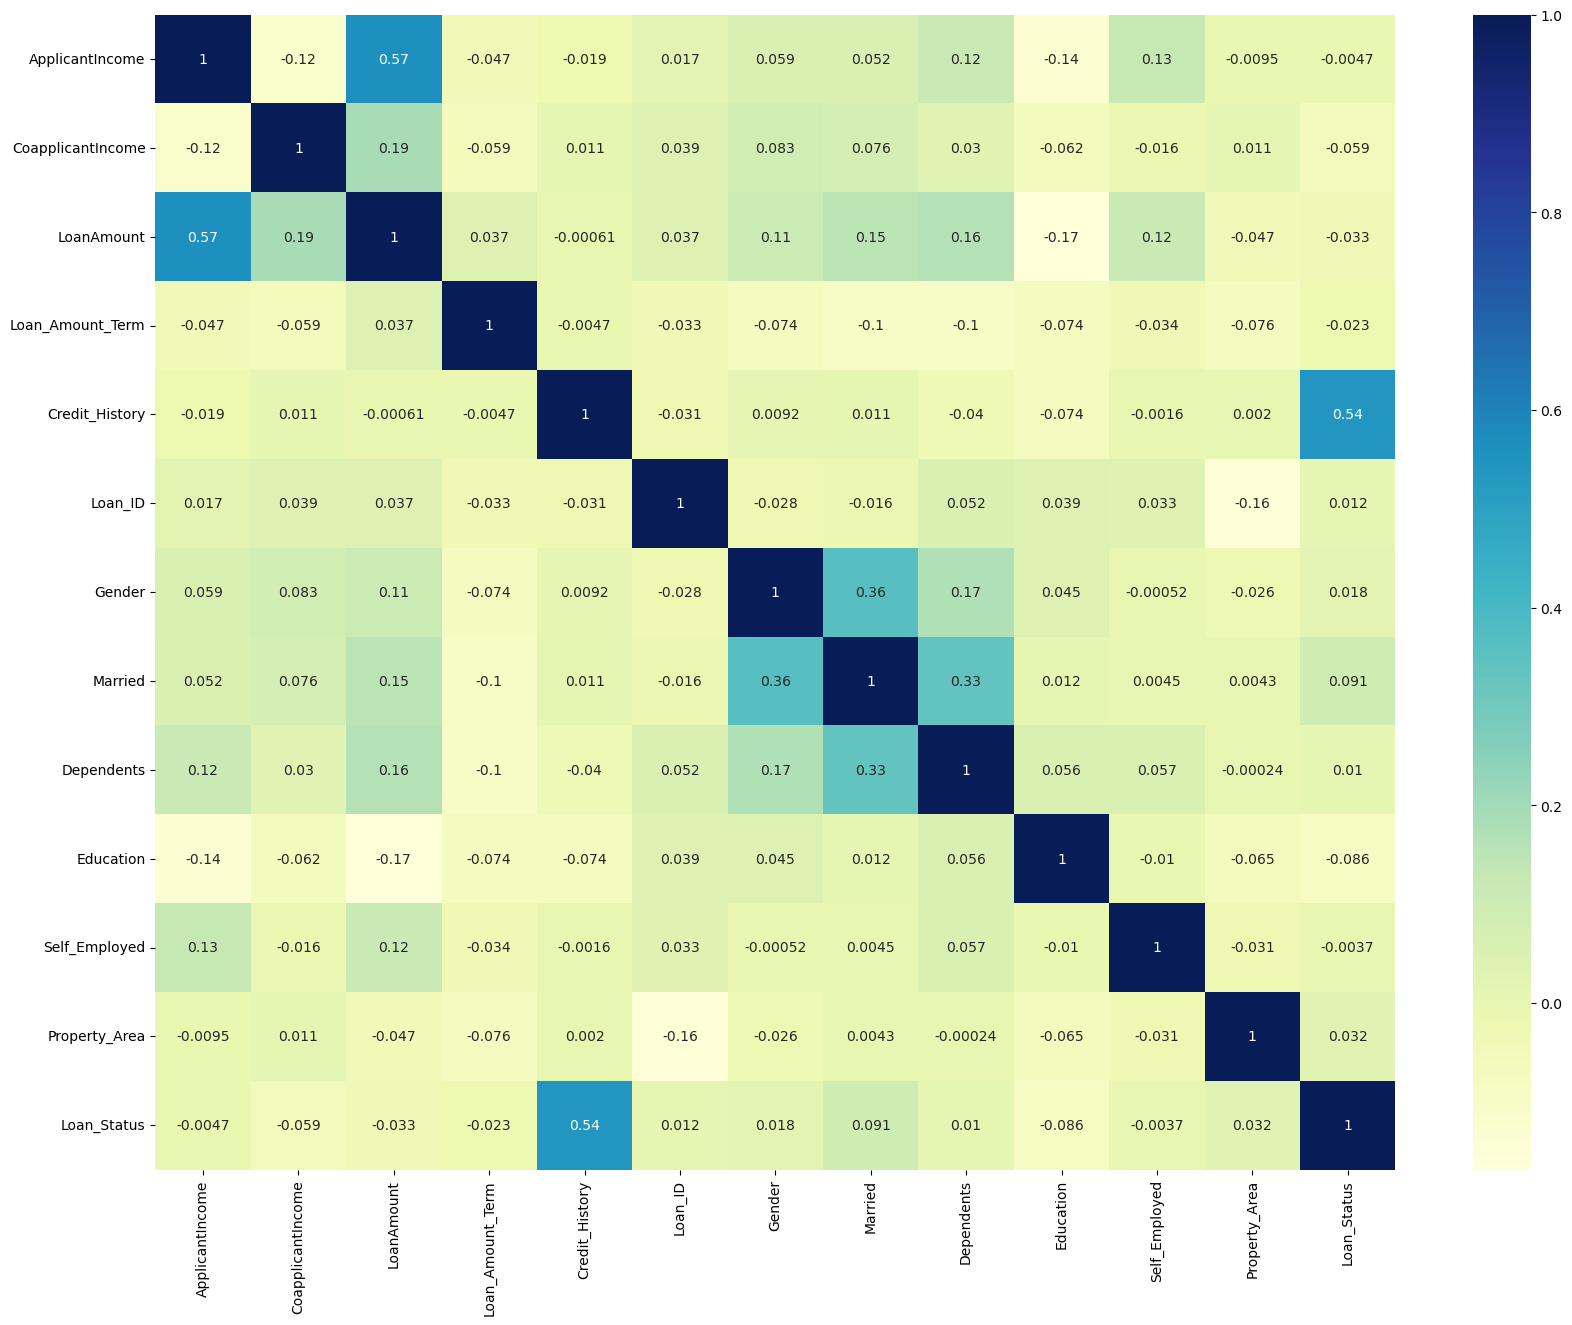

In [344]:
plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.show()

In [345]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model1 = log_model.fit(x_train, y_train)
y_pred1 = log_model1.predict(x_test)

C:\Users\anupa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [346]:
accuracy_score(y_test, y_pred1)

0.7479674796747967

In [347]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.select_dtypes(include=['number']))

In [348]:
 from sklearn.ensemble import RandomForestClassifier

In [349]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train, y_train)

In [350]:
y_pred_rf = rf_cls.predict(x_test)

In [351]:
confusion_matrix(y_test, y_pred_rf)

array([[18, 25],
       [ 2, 78]], dtype=int64)

In [352]:
print('Accuracy is:', accuracy_score(y_test,y_pred_rf))
print('Precision is:', precision_score(y_test,y_pred_rf))
print('Recall is:', recall_score(y_test,y_pred_rf))
print('F1_score is:', f1_score(y_test,y_pred_rf))

Accuracy is: 0.7804878048780488
Precision is: 0.7572815533980582
Recall is: 0.975
F1_score is: 0.8524590163934427


In [353]:
from sklearn.model_selection import GridSearchCV

In [354]:
param_grid = {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 200}


In [355]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6)
model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7642276422764228


In [356]:
dftest=pd.read_csv(r"C:\Users\anupa\Downloads\test_lAUu6dG.csv")

In [357]:
dftest.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [358]:

dftest.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [359]:
num_dftest =dftest.select_dtypes(include = "number")
cat_dftest = dftest.select_dtypes(include = "object")

In [360]:
dfnum_cols = num_dftest.columns.to_list()

In [361]:
dfcat_cols = cat_dftest.columns.to_list()

In [362]:
# data.hist(dfnum_cols)

In [363]:
# for col in dfnum_cols:
print(data[dfnum_cols].skew())

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64


In [364]:
for col in num_dftest.columns:
    if  num_dftest[col].skew() >= 0 and num_dftest[col].skew() <= 0.5:
        num_dftest[col] = num_dftest[col].fillna(num_dftest[col].mean())
    else:
        num_dftest[col] = num_dftest[col].fillna(num_dftest[col].median())

In [365]:
for col in cat_dftest.columns:
    cat_dftest[col] = cat_dftest[col].fillna(cat_dftest[col].mode()[0]) 

In [366]:
dftest = pd.concat([num_dftest, cat_dftest], axis = 1)

In [367]:
cat_dftest.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [368]:
dfcat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [369]:
for col in ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed','Property_Area']:
    dftest[col] = Label_Encoder.fit_transform(dftest[col])


In [370]:
dftest.head(2)
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    367 non-null    int64  
 1   CoapplicantIncome  367 non-null    int64  
 2   LoanAmount         367 non-null    float64
 3   Loan_Amount_Term   367 non-null    float64
 4   Credit_History     367 non-null    float64
 5   Loan_ID            367 non-null    int32  
 6   Gender             367 non-null    int32  
 7   Married            367 non-null    int32  
 8   Dependents         367 non-null    object 
 9   Education          367 non-null    int32  
 10  Self_Employed      367 non-null    int32  
 11  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 25.9+ KB


In [371]:
dfcat_cols = dftest.select_dtypes(include = ['object']).columns.tolist()

In [372]:
dfcat_cols 

['Dependents']

In [373]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

for col in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']:
    dftest[col] = Label_Encoder.fit_transform(dftest[col])

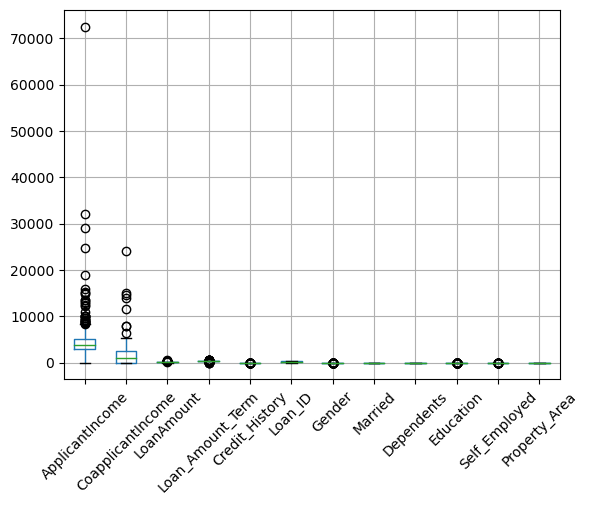

In [374]:
dftest.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [375]:
dftest.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
362    False
363    False
364    False
365    False
366    False
Length: 367, dtype: bool

In [376]:
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [377]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features1 = scaler.fit_transform(dftest.select_dtypes(include=['number']))

In [378]:
test_pred = rf_cls.predict(dftest)
test_pred2 = model_xgb.predict(dftest)

In [379]:
test_pred = rf_cls.predict(dftest)
test_pred2 = model_xgb.predict(dftest)

In [380]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [381]:
submission = pd.DataFrame({'Loan_ID': dftest['Loan_ID'],'Loan_Status': test_pred})
submission.to_csv("sample_submission.csv", index=False)


In [382]:
submission2 = pd.DataFrame({'Loan_ID':dftest['Loan_ID'],'Loan_Status': test_pred2})
submission2.to_csv("sample_submission2.csv", index=False)


In [384]:
submission = pd.read_csv("sample_submission.csv")

submission.to_csv("new__sample_submission.csv", index=False)